In [1]:
from data_cleaning import *


c:\Users\Tyreek ALEXANDER\OneDrive - Northern Caribbean University\Documents\EffectiveXGBoost\SURVEY\preprocessing.py:19: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag=pd.read_csv(z.open(member_name))


In [2]:
from sklearn import tree
stump_dt=tree.DecisionTreeClassifier(max_depth=1)
Xtrain=kag_pl.fit_transform(kag_X_train)
stump_dt.fit(Xtrain,kag_y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'r <= 0.5\ngini = 0.496\nsamples = 2110\nvalue = [1153, 957]\nclass = Data Scientist'),
 Text(0.25, 0.25, 'gini = 0.493\nsamples = 1484\nvalue = [653, 831]\nclass = Software Engineer'),
 Text(0.75, 0.25, 'gini = 0.322\nsamples = 626\nvalue = [500, 126]\nclass = Data Scientist')]

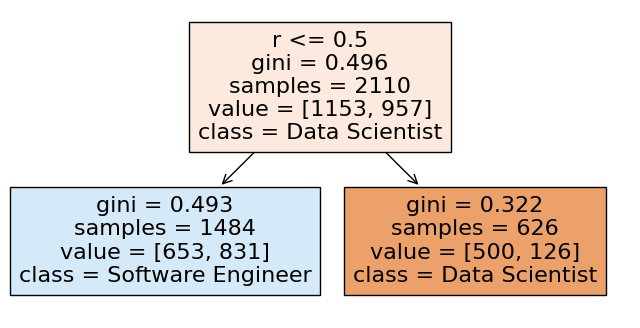

In [3]:
fig,ax=plt.subplots(figsize=(8,4))
features= list(c for c in Xtrain.columns)
tree.plot_tree(stump_dt,
               feature_names=features,
               filled=True,
               class_names=stump_dt.classes_,
               ax=ax)

In [4]:
Xtest=kag_pl.transform(kag_X_test)
stump_dt.score(Xtest,kag_y_test)

0.6243093922651933

In [5]:
# a dummy model

from sklearn import dummy

dummy_model=dummy.DummyClassifier()
dummy_model.fit(Xtrain,kag_y_train)
dummy_model.score(Xtest,kag_y_test)

0.5458563535911602

In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

ytrain=label_encoder.fit_transform(kag_y_train)
ytest=label_encoder.transform(kag_y_test)

# show encoded value via index [0,1,2,...,n]
label_encoder.classes_

array(['Data Scientist', 'Software Engineer'], dtype=object)

In [7]:
#XGBoosted stump
import xgboost as xgb
kag_stump=xgb.XGBClassifier(n_estimators=1,max_depth=1)
kag_stump.fit(Xtrain,ytrain)
kag_stump.score(Xtest,ytest)

0.6243093922651933


logistic regression predicts true or false
fits a s-shaped curve
predicts probabilities
usually used for classification 

https://www.youtube.com/watch?v=yIYKR4sgzI8

In [8]:
underfit=tree.DecisionTreeClassifier(max_depth=1)
Xtrain=kag_pl.fit_transform(kag_X_train)
underfit.fit(Xtrain,kag_y_train)
underfit.score(Xtest,kag_y_test)

0.6243093922651933

In [9]:
hi_variance=tree.DecisionTreeClassifier(max_depth=7)
# max depth = none overfits the tree
# overfitting is memorizing the training data 
# understance variance as 'deciding factors'
Xtrain=kag_pl.fit_transform(kag_X_train)
hi_variance.fit(Xtrain,kag_y_train)
hi_variance.score(Xtest,kag_y_test)

0.7348066298342542

[Text(0.5, 0.875, 'r <= 0.5\ngini = 0.496\nsamples = 2110\nvalue = [1153, 957]\nclass = Data Scientist'),
 Text(0.25, 0.625, 'major_cs <= 0.5\ngini = 0.493\nsamples = 1484\nvalue = [653, 831]\nclass = Software Engineer'),
 Text(0.125, 0.375, 'Q3_United States of America <= 0.5\ngini = 0.49\nsamples = 718\nvalue = [410, 308]\nclass = Data Scientist'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'years_exp <= 2.5\ngini = 0.433\nsamples = 766\nvalue = [243, 523]\nclass = Software Engineer'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'major_cs <= 0.5\ngini = 0.322\nsamples = 626\nvalue = [500, 126]\nclass = Data Scientist'),
 Text(0.625, 0.375, 'years_exp <= 22.5\ngini = 0.211\nsamples = 443\nvalue = [390, 53]\nclass = Data Scientist'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'years_exp <= 7.5\ngini = 0.48\nsamples = 183\nval

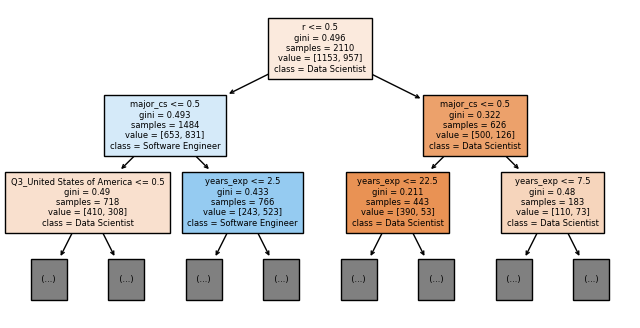

In [10]:
fig,ax=plt.subplots(figsize=(8,4))
features=list(c for c in Xtrain.columns)
tree.plot_tree(hi_variance,feature_names=features,filled=True,class_names=hi_variance.classes_,max_depth=2,fontsize=6)

In [11]:
hi_variance.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

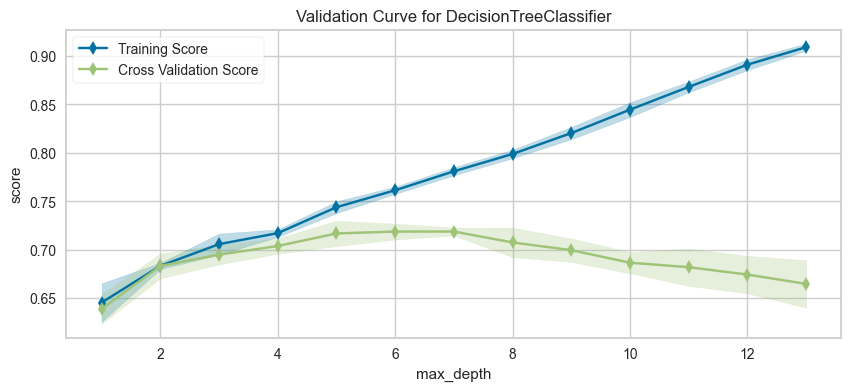

In [12]:
from yellowbrick.model_selection import validation_curve

fig,ax=plt.subplots(figsize=(10,4))
viz=validation_curve(tree.DecisionTreeClassifier(),
                     X=pd.concat([Xtrain,Xtest]),
                     y=pd.concat([kag_y_train,kag_y_test]),
                     param_name='max_depth',param_range=range(1,14),
                     scoring='accuracy',cv=5,ax=ax,n_jobs=6)

shaded area is due to cross validation score. thin shade is better because it shows consistency across each cross validation split

In [13]:
from sklearn.model_selection import GridSearchCV
params={ 
    'max_depth':[3,5,7,8],
    'min_samples_leaf':[1,2,3,4,5,6],
    'min_samples_split':[2,3,4,5,6],
}

grid_search=GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                         param_grid=params,
                         cv=4,
                         n_jobs=-1,
                         verbose=1,
                         scoring="accuracy")
grid_search.fit(pd.concat([Xtrain,Xtest]),
                pd.concat([kag_y_train,kag_y_test]))


Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 6}

In [15]:
between2=tree.DecisionTreeClassifier(**grid_search.best_params_)
between2.fit(Xtrain,kag_y_train)
between2.score(Xtest,kag_y_test)

0.7259668508287292